/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/covmodel/plot.py:121: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Stable(dim=2, var=1.92, len_scale=8.15, nugget=0.0, alpha=1.05)


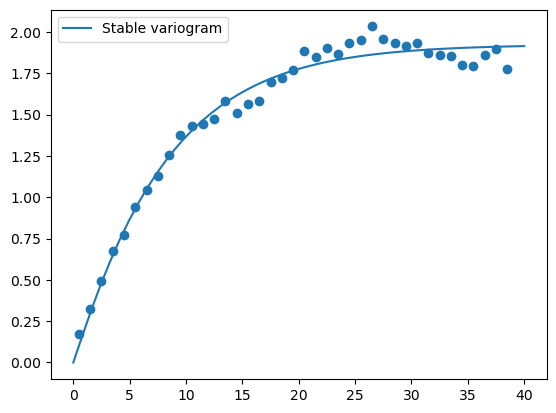

In [1]:
"""
Fit Variogram
-------------
"""
import numpy as np

import gstools as gs

###############################################################################
# Generate a synthetic field with an exponential model.

x = np.random.RandomState(19970221).rand(1000) * 100.0
y = np.random.RandomState(20011012).rand(1000) * 100.0
model = gs.Exponential(dim=2, var=2, len_scale=8)
srf = gs.SRF(model, mean=0, seed=19970221)
field = srf((x, y))

###############################################################################
# Estimate the variogram of the field with 40 bins.

bins = np.arange(40)
bin_center, gamma = gs.vario_estimate((x, y), field, bins)

###############################################################################
# Fit the variogram with a stable model (no nugget fitted).

fit_model = gs.Stable(dim=2)
fit_model.fit_variogram(bin_center, gamma, nugget=False)

###############################################################################
# Plot the fitting result.

ax = fit_model.plot(x_max=40)
ax.scatter(bin_center, gamma)
print(fit_model)


RANKING by Pseudo-r2 score
     1.          Stable: 0.98218
     2.          Matern: 0.98176
     3.  SuperSpherical: 0.98141
     4.     Exponential: 0.98041
     5.        Rational: 0.97711
     6.       Spherical: 0.97334
     7.        Circular: 0.96725
     8.        Gaussian: 0.95928
     9.         JBessel: 0.95831


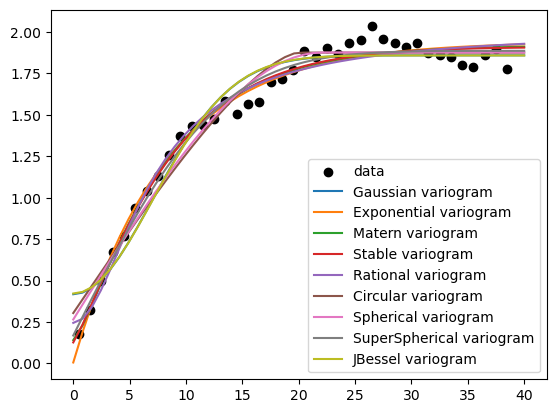

In [2]:
"""
Finding the best fitting variogram model
----------------------------------------
"""
import numpy as np
from matplotlib import pyplot as plt

import gstools as gs

###############################################################################
# Generate a synthetic field with an exponential model.

x = np.random.RandomState(19970221).rand(1000) * 100.0
y = np.random.RandomState(20011012).rand(1000) * 100.0
model = gs.Exponential(dim=2, var=2, len_scale=8)
srf = gs.SRF(model, mean=0, seed=19970221)
field = srf((x, y))

###############################################################################
# Estimate the variogram of the field with 40 bins and plot the result.

bins = np.arange(40)
bin_center, gamma = gs.vario_estimate((x, y), field, bins)

###############################################################################
# Define a set of models to test.

models = {
    "Gaussian": gs.Gaussian,
    "Exponential": gs.Exponential,
    "Matern": gs.Matern,
    "Stable": gs.Stable,
    "Rational": gs.Rational,
    "Circular": gs.Circular,
    "Spherical": gs.Spherical,
    "SuperSpherical": gs.SuperSpherical,
    "JBessel": gs.JBessel,
}
scores = {}

###############################################################################
# Iterate over all models, fit their variogram and calculate the r2 score.

# plot the estimated variogram
plt.scatter(bin_center, gamma, color="k", label="data")
ax = plt.gca()

# fit all models to the estimated variogram
for model in models:
    fit_model = models[model](dim=2)
    para, pcov, r2 = fit_model.fit_variogram(bin_center, gamma, return_r2=True)
    fit_model.plot(x_max=40, ax=ax)
    scores[model] = r2

###############################################################################
# Create a ranking based on the score and determine the best models

ranking = sorted(scores.items(), key=lambda item: item[1], reverse=True)
print("RANKING by Pseudo-r2 score")
for i, (model, score) in enumerate(ranking, 1):
    print(f"{i:>6}. {model:>15}: {score:.5}")

plt.show()


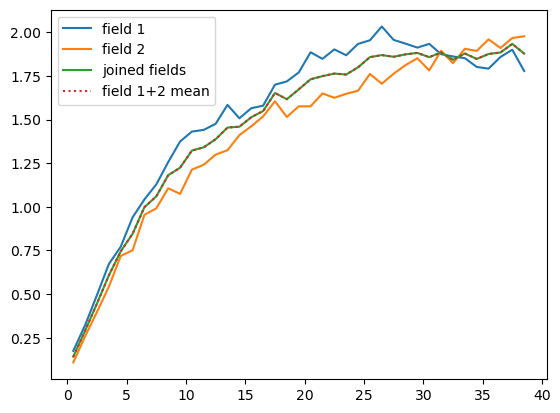

In [3]:
"""
Multi-field variogram estimation
--------------------------------

In this example, we demonstrate how to estimate a variogram from multiple
fields on the same point-set that should have the same statistical properties.
"""
import matplotlib.pyplot as plt
import numpy as np

import gstools as gs

x = np.random.RandomState(19970221).rand(1000) * 100.0
y = np.random.RandomState(20011012).rand(1000) * 100.0
model = gs.Exponential(dim=2, var=2, len_scale=8)
srf = gs.SRF(model, mean=0)

###############################################################################
# Generate two synthetic fields with an exponential model.

field1 = srf((x, y), seed=19970221)
field2 = srf((x, y), seed=20011012)
fields = [field1, field2]

###############################################################################
# Now we estimate the variograms for both fields individually and then again
# simultaneously with only one call.

bins = np.arange(40)
bin_center, gamma1 = gs.vario_estimate((x, y), field1, bins)
bin_center, gamma2 = gs.vario_estimate((x, y), field2, bins)
bin_center, gamma = gs.vario_estimate((x, y), fields, bins)

###############################################################################
# Now we demonstrate that the mean variogram from both fields coincides
# with the joined estimated one.

plt.plot(bin_center, gamma1, label="field 1")
plt.plot(bin_center, gamma2, label="field 2")
plt.plot(bin_center, gamma, label="joined fields")
plt.plot(bin_center, 0.5 * (gamma1 + gamma2), ":", label="field 1+2 mean")
plt.legend()
plt.show()


Original:
Exponential(dim=2, var=1.0, len_scale=10.0, nugget=0.0, anis=[0.5], angles=[0.393])
Fitted:
Exponential(dim=2, var=0.942, len_scale=9.14, nugget=1.1e-17, anis=[0.529], angles=[0.393])


/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/covmodel/plot.py:211: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/field/plot.py:406: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


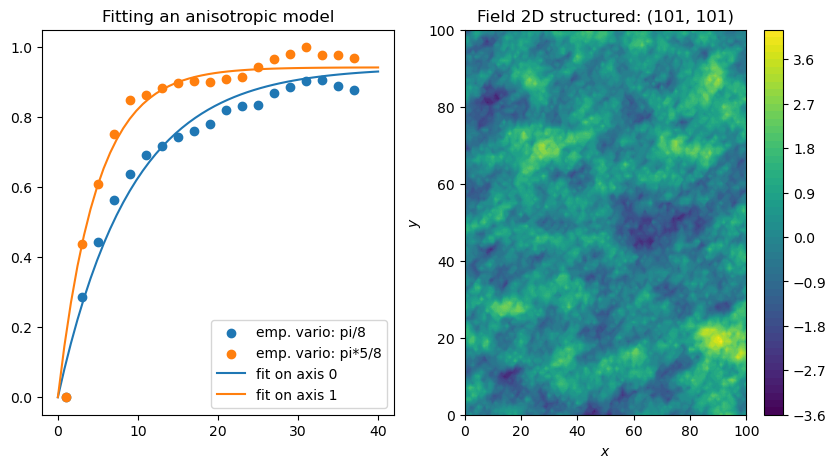

In [4]:
"""
Directional variogram estimation and fitting in 2D
--------------------------------------------------

In this example, we demonstrate how to estimate a directional variogram by
setting the direction angles in 2D.

Afterwards we will fit a model to this estimated variogram and show the result.
"""
import numpy as np
from matplotlib import pyplot as plt

import gstools as gs

###############################################################################
# Generating synthetic field with anisotropy and a rotation of 22.5 degree.

angle = np.pi / 8
model = gs.Exponential(dim=2, len_scale=[10, 5], angles=angle)
x = y = range(101)
srf = gs.SRF(model, seed=123456)
field = srf((x, y), mesh_type="structured")

###############################################################################
# Now we are going to estimate a directional variogram with an angular
# tolerance of 11.25 degree and a bandwith of 8.

bins = range(0, 40, 2)
bin_center, dir_vario, counts = gs.vario_estimate(
    *((x, y), field, bins),
    direction=gs.rotated_main_axes(dim=2, angles=angle),
    angles_tol=np.pi / 16,
    bandwidth=8,
    mesh_type="structured",
    return_counts=True,
)

###############################################################################
# Afterwards we can use the estimated variogram to fit a model to it:

print("Original:")
print(model)
model.fit_variogram(bin_center, dir_vario)
print("Fitted:")
print(model)

###############################################################################
# Plotting.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 5])

ax1.scatter(bin_center, dir_vario[0], label="emp. vario: pi/8")
ax1.scatter(bin_center, dir_vario[1], label="emp. vario: pi*5/8")
ax1.legend(loc="lower right")

model.plot("vario_axis", axis=0, ax=ax1, x_max=40, label="fit on axis 0")
model.plot("vario_axis", axis=1, ax=ax1, x_max=40, label="fit on axis 1")
ax1.set_title("Fitting an anisotropic model")

srf.plot(ax=ax2)
plt.show()

###############################################################################
# Without fitting a model, we see that the correlation length in the main
# direction is greater than the transversal one.


Original:
Gaussian(dim=3, var=1.0, len_scale=16.0, nugget=0.0, anis=[0.5, 0.25], angles=[1.57, 0.785, 0.393])
Fitted:
Gaussian(dim=3, var=0.972, len_scale=13.0, nugget=0.0138, anis=[0.542, 0.281], angles=[1.57, 0.785, 0.393])


/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/covmodel/plot.py:211: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


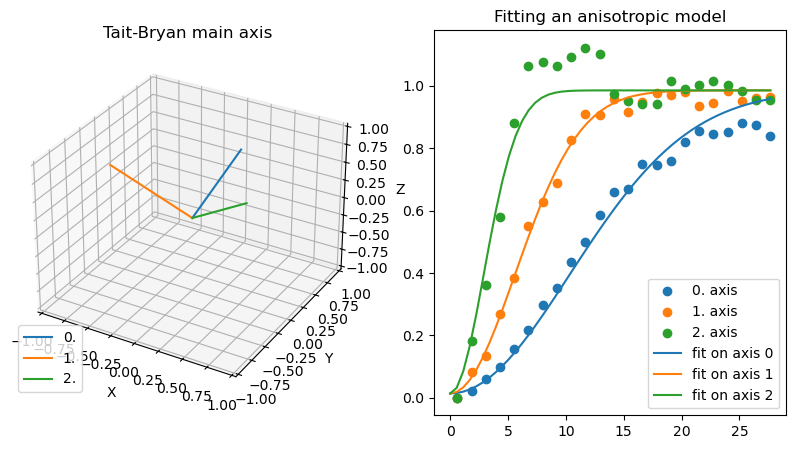

/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/field/plot.py:310: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: title={'center': 'Field 3D structured (50, 50, 50)'}, xlabel='$x$', ylabel='$y$'>

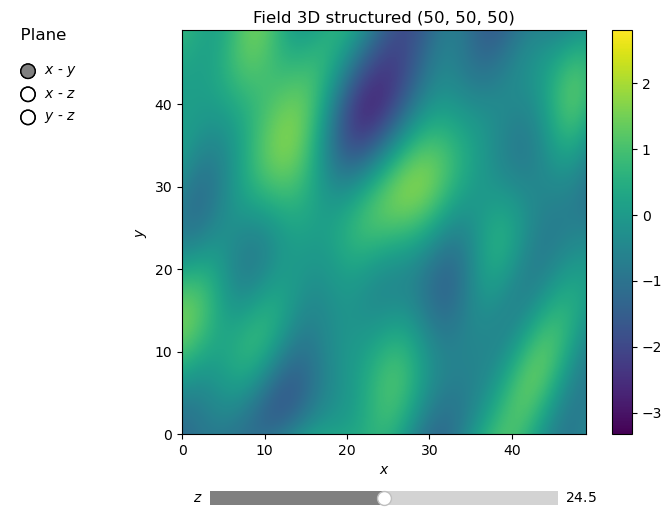

In [5]:

"""
Directional variogram estimation and fitting in 3D
--------------------------------------------------

In this example, we demonstrate how to estimate a directional variogram by
setting the estimation directions in 3D.

Afterwards we will fit a model to this estimated variogram and show the result.
"""
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import gstools as gs

###############################################################################
# Generating synthetic field with anisotropy and rotation by Tait-Bryan angles.

dim = 3
# rotation around z, y, x
angles = [np.deg2rad(90), np.deg2rad(45), np.deg2rad(22.5)]
model = gs.Gaussian(dim=3, len_scale=[16, 8, 4], angles=angles)
x = y = z = range(50)
pos = (x, y, z)
srf = gs.SRF(model, seed=1001)
field = srf.structured(pos)

###############################################################################
# Here we generate the axes of the rotated coordinate system
# to get an impression what the rotation angles do.

# All 3 axes of the rotated coordinate-system
main_axes = gs.rotated_main_axes(dim, angles)
axis1, axis2, axis3 = main_axes

###############################################################################
# Now we estimate the variogram along the main axes. When the main axes are
# unknown, one would need to sample multiple directions and look for the one
# with the longest correlation length (flattest gradient).
# Then check the transversal directions and so on.

bin_center, dir_vario, counts = gs.vario_estimate(
    pos,
    field,
    direction=main_axes,
    bandwidth=10,
    sampling_size=2000,
    sampling_seed=1001,
    mesh_type="structured",
    return_counts=True,
)

###############################################################################
# Afterwards we can use the estimated variogram to fit a model to it.
# Note, that the rotation angles need to be set beforehand.

print("Original:")
print(model)
model.fit_variogram(bin_center, dir_vario)
print("Fitted:")
print(model)

###############################################################################
# Plotting main axes and the fitted directional variogram.

fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(121, projection=Axes3D.name)
ax2 = fig.add_subplot(122)

ax1.plot([0, axis1[0]], [0, axis1[1]], [0, axis1[2]], label="0.")
ax1.plot([0, axis2[0]], [0, axis2[1]], [0, axis2[2]], label="1.")
ax1.plot([0, axis3[0]], [0, axis3[1]], [0, axis3[2]], label="2.")
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_zlim(-1, 1)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_title("Tait-Bryan main axis")
ax1.legend(loc="lower left")

x_max = max(bin_center)
ax2.scatter(bin_center, dir_vario[0], label="0. axis")
ax2.scatter(bin_center, dir_vario[1], label="1. axis")
ax2.scatter(bin_center, dir_vario[2], label="2. axis")
model.plot("vario_axis", axis=0, ax=ax2, x_max=x_max, label="fit on axis 0")
model.plot("vario_axis", axis=1, ax=ax2, x_max=x_max, label="fit on axis 1")
model.plot("vario_axis", axis=2, ax=ax2, x_max=x_max, label="fit on axis 2")
ax2.set_title("Fitting an anisotropic model")
ax2.legend()

plt.show()

###############################################################################
# Also, let's have a look at the field.

srf.plot()


In [ ]:
"""
Fit Variogram with automatic binning
------------------------------------
"""
import numpy as np

import gstools as gs

###############################################################################
# Generate a synthetic field with an exponential model.

x = np.random.RandomState(19970221).rand(1000) * 100.0
y = np.random.RandomState(20011012).rand(1000) * 100.0
model = gs.Exponential(dim=2, var=2, len_scale=8)
srf = gs.SRF(model, mean=0, seed=19970221)
field = srf((x, y))
print(field.var())
###############################################################################
# Estimate the variogram of the field with automatic binning.

bin_center, gamma = gs.vario_estimate((x, y), field)
print("estimated bin number:", len(bin_center))
print("maximal bin distance:", max(bin_center))

###############################################################################
# Fit the variogram with a stable model (no nugget fitted).

fit_model = gs.Stable(dim=2)
fit_model.fit_variogram(bin_center, gamma, nugget=False)
print(fit_model)

###############################################################################
# Plot the fitting result.

ax = fit_model.plot(x_max=max(bin_center))
ax.scatter(bin_center, gamma)


1.6791948750716688


In [ ]:
"""
Automatic binning with lat-lon data
-----------------------------------

In this example we demonstrate automatic binning for a tiny data set
containing temperature records from Germany
(See the detailed DWD example for more information on the data).

We use a data set from 20 meteo-stations choosen randomly.
"""
import numpy as np

import gstools as gs

# lat, lon, temperature
data = np.array(
    [
        [52.9336, 8.237, 15.7],
        [48.6159, 13.0506, 13.9],
        [52.4853, 7.9126, 15.1],
        [50.7446, 9.345, 17.0],
        [52.9437, 12.8518, 21.9],
        [53.8633, 8.1275, 11.9],
        [47.8342, 10.8667, 11.4],
        [51.0881, 12.9326, 17.2],
        [48.406, 11.3117, 12.9],
        [49.7273, 8.1164, 17.2],
        [49.4691, 11.8546, 13.4],
        [48.0197, 12.2925, 13.9],
        [50.4237, 7.4202, 18.1],
        [53.0316, 13.9908, 21.3],
        [53.8412, 13.6846, 21.3],
        [54.6792, 13.4343, 17.4],
        [49.9694, 9.9114, 18.6],
        [51.3745, 11.292, 20.2],
        [47.8774, 11.3643, 12.7],
        [50.5908, 12.7139, 15.8],
    ]
)
pos = data.T[:2]  # lat, lon
field = data.T[2]  # temperature

###############################################################################
# Since the overall range of these meteo-stations is too low, we can use the
# data-variance as additional information during the fit of the variogram.

emp_v = gs.vario_estimate(pos, field, latlon=True, geo_scale=gs.KM_SCALE)
sph = gs.Spherical(latlon=True, geo_scale=gs.KM_SCALE)
sph.fit_variogram(*emp_v, sill=np.var(field))
ax = sph.plot("vario_yadrenko", x_max=2 * np.max(emp_v[0]))
ax.scatter(*emp_v, label="Empirical variogram")
ax.legend()
print(sph)

###############################################################################
# As we can see, the variogram fitting was successful and providing the data
# variance helped finding the right length-scale.
#
# Now, we'll use this covariance model to interpolate the given data with
# ordinary kriging.

# enclosing box for data points
grid_lat = np.linspace(np.min(pos[0]), np.max(pos[0]))
grid_lon = np.linspace(np.min(pos[1]), np.max(pos[1]))
# ordinary kriging
krige = gs.krige.Ordinary(sph, pos, field)
krige((grid_lat, grid_lon), mesh_type="structured")
ax = krige.plot()
# plotting lat on y-axis and lon on x-axis
ax.scatter(pos[1], pos[0], 50, c=field, edgecolors="k", label="input")
ax.legend()

###############################################################################
# Looks good, doesn't it?
#
# This workflow is also implemented in the :any:`Krige` class, by setting
# ``fit_variogram=True``. Then the whole procedure shortens:

krige = gs.krige.Ordinary(sph, pos, field, fit_variogram=True)
krige.structured((grid_lat, grid_lon))

# plot the result
krige.plot()
# show the fitting results
print(krige.model)

###############################################################################
# This example shows, that setting up variogram estimation and kriging routines
# is straight forward with GSTools!
